Importing headers

In [311]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

Importing data from the .csv file

In [312]:
df1 = pd.read_csv("MLFW_Assignment.csv")
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [313]:
df1.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for the number of NULL values present

In [314]:
df1.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

## Plotting the values to explore the features

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

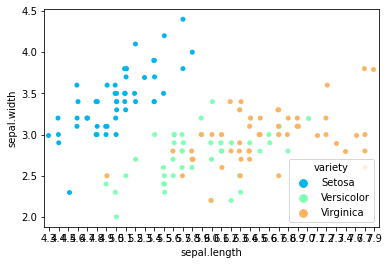

In [315]:
sns.stripplot(x="sepal.length", y="sepal.width", hue="variety",data=df1, palette='rainbow')

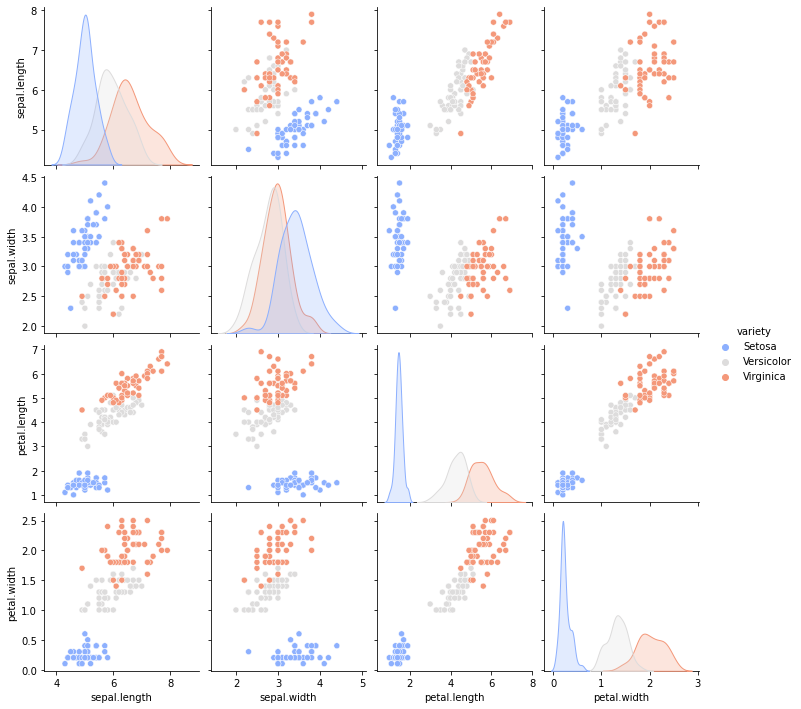

In [316]:
sns.pairplot(df1 , hue='variety', palette='coolwarm')

Plotting the values in histograms

## Histogram

Text(0.5, 0.98, 'Checking the relation of different attributes to variety using histogram')

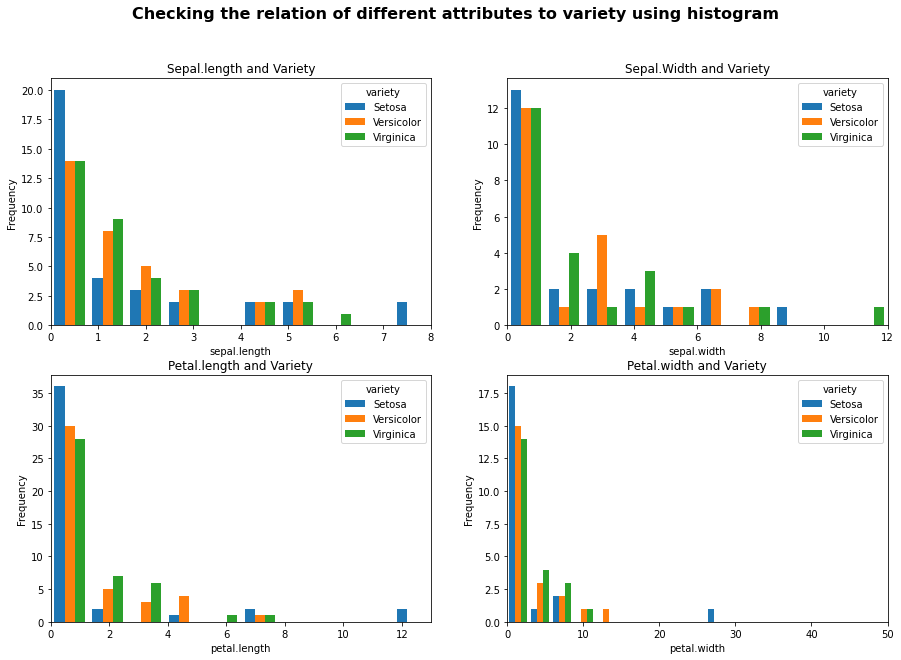

In [317]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(ncols=2,
                                             nrows=2,
                                             figsize=(15, 10))

ax0.hist(pd.crosstab(df1["sepal.length"], df1["variety"]), bins=10)
ax0.legend(df1["variety"].unique(), title="variety")

ax0.set(title="Sepal.length and Variety",
        xlabel="sepal.length",
        ylabel="Frequency",
        xlim=[0, 8])

ax1.hist(pd.crosstab(df1["sepal.width"], df1["variety"]), bins=10)
ax1.legend(df1["variety"].unique(), title="variety")
ax1.set(title="Sepal.Width and Variety",
        xlabel="sepal.width",
        ylabel="Frequency",
        xlim=[0, 12])

ax2.hist(pd.crosstab(df1["petal.length"], df1["variety"]), bins=10)
ax2.legend(df1["variety"].unique(), title="variety")

ax2.set(title="Petal.length and Variety",
        xlabel="petal.length",
        ylabel="Frequency",
        xlim=[0, 13])

ax3.hist(pd.crosstab(df1["petal.width"], df1["variety"]), bins=10)
ax3.legend(df1["variety"].unique(), title="variety")
ax3.set(title="Petal.width and Variety",
        xlabel="petal.width",
        ylabel="Frequency",
        xlim=[0, 50])

fig.suptitle(
    "Checking the relation of different attributes to variety using histogram",
    fontsize=16,
    fontweight="bold")


Converting the target variable to numeric type. Since there are 3 variety values, we are numbering them as 0, 1 and 2.

In [318]:
variety_num = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

df1['variety'] = df1['variety'].map(variety_num)

In [319]:
df1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Creating two dataframes

In [320]:
X= df1.drop('variety',axis=1)
Y= df1['variety']
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [321]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

## Ratios of training, validation and test data is 60-20-20

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Ratios of training, validation and test data is 80-10-10

In [323]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)

## Implementing KFold Cross Validation on dataset 1

In [324]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
scores

array([0.94444444, 0.72222222, 1.        , 1.        , 0.94444444])

## Implementing KFold Cross Validation on dataset 2

In [325]:
rf = RandomForestClassifier()

scores_1 = cross_val_score(rf, X1_train, y1_train.values.ravel(), cv=5)
scores_1

array([0.95833333, 1.        , 0.79166667, 1.        , 0.95833333])

In [326]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [327]:
X1_train.shape, y1_train.shape

((120, 4), (120,))

## Implementing Grid Search to find optimal hyperparameters for Random Forest algorithm

In [329]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [330]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())
    
print_results(cv)
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'RF_my_model.pkl')

BEST PARAMS: {'max_depth': 20, 'n_estimators': 5}

0.878 (+/-0.178) for {'max_depth': 2, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 50}
0.911 (+/-0.206) for {'max_depth': 2, 'n_estimators': 100}
0.922 (+/-0.166) for {'max_depth': 10, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 10, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 10, 'n_estimators': 100}
0.933 (+/-0.163) for {'max_depth': 20, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 20, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 20, 'n_estimators': 100}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': None, 'n_estimators': 50}
0.9 (+/-0.178) for {'max_depth': None, 'n_estimators': 100}


['RF_my_model.pkl']

In [331]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X1_train, y1_train.values.ravel())

print_results(cv)
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'RF_my_model2.pkl')

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.917 (+/-0.105) for {'max_depth': 2, 'n_estimators': 5}
0.95 (+/-0.162) for {'max_depth': 2, 'n_estimators': 50}
0.95 (+/-0.162) for {'max_depth': 2, 'n_estimators': 100}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 10, 'n_estimators': 100}
0.9 (+/-0.1) for {'max_depth': 20, 'n_estimators': 5}
0.95 (+/-0.082) for {'max_depth': 20, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 20, 'n_estimators': 100}
0.917 (+/-0.105) for {'max_depth': None, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': None, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': None, 'n_estimators': 100}


['RF_my_model2.pkl']

## Implementing Grid Search to find optimal hyperparameters for Support Vector Machines algorithm

In [332]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'SVM_my_model.pkl')

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


['SVM_my_model.pkl']

In [333]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X1_train, y1_train.values.ravel())

print_results(cv)
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'SVM_my_model2.pkl')

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.942 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.155) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


['SVM_my_model2.pkl']

## Implementing Grid Search to find optimal hyperparameters for Logistic Regression algorithm

In [334]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())
print_results(cv)
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'LR_my_model.pkl')

C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.622 (+/-0.333) for {'C': 0.001}
0.833 (+/-0.199) for {'C': 0.01}
0.911 (+/-0.166) for {'C': 0.1}
0.944 (+/-0.172) for {'C': 1}
0.944 (+/-0.122) for {'C': 10}
0.944 (+/-0.172) for {'C': 100}
0.944 (+/-0.172) for {'C': 1000}


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

['LR_my_model.pkl']

In [335]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X1_train, y1_train.values.ravel())

print_results(cv)
cv.best_estimator_
joblib.dump(cv.best_estimator_, 'LR_my_model2.pkl')

C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.817 (+/-0.201) for {'C': 0.001}
0.858 (+/-0.194) for {'C': 0.01}
0.933 (+/-0.113) for {'C': 0.1}
0.967 (+/-0.097) for {'C': 1}
0.942 (+/-0.113) for {'C': 10}
0.95 (+/-0.122) for {'C': 100}
0.95 (+/-0.122) for {'C': 1000}


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

['LR_my_model2.pkl']

On comparing the data for the best parameter in all the above cases, we can see that the models trained with the second dataset that had a split ratio of 80-10-10 returned better values than the first dataset having 60-20-20 ratio. In all the three algorithms, if we compare the best parameter value for both the datasets, we can see that in Random Forest algorithm, the value for first dataset is 0.933 where as for the second one is 0.958, similarly for Support Vector machines, the value for the first dataset is 0.956 whereas for the second one it is 0.958 and finally for the logistic regression,  the value for the first dataset is 0.944 and the second one is 0.967. Hence, the 80-10-10  data split ratio is better than the 60-20-20. 

## Comparing the models created based on the first data set.

In [336]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('{}_my_model.pkl'.format(mdl))
    
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=20, n_estimators=5)}

In [337]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = accuracy_score(labels, pred)
    precision = round(precision_score(labels, pred, pos_label='positive', average='micro'), 3)
    recall = round(recall_score(labels, pred, pos_label='positive', average='micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

Evaluating the validation data from the second dataset.

In [300]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 4.5ms
RF -- Accuracy: 0.9666666666666667 / Precision: 0.967 / Recall: 0.967 / Latency: 8.0ms


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-

Evaluating the test data from the first dataset.

In [344]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.1ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 16.0ms


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-

## Comparing the models created based on the second dataset

In [338]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('{}_my_model2.pkl'.format(mdl))
    
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier()}

Evaluating the validation data from the second dataset.

In [339]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X1_val, y1_val)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.1ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 16.0ms


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-

Evaluating the test data from the second dataset.

In [343]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X1_test, y1_test)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 8.5ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 19.1ms


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-

## Evaluating best model on test set of the second dataset

On comparing the performance of the models based on the parameters like accuracy, precision, recall and latency, Logistic Regression turned out to be the best model to train the second dataset. It is similar to the other two models in accuracy, precision and recall but has the lowest latency when compared with the performance of the other models. The second dataset had the most train data thereby making the model more effecient.

In [340]:
models = {}

for mdl in ['LR', 'SVM', 'RF']:
    models[mdl] = joblib.load('{}_my_model2.pkl'.format(mdl))
    
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier()}

In [341]:
evaluate_model('Logistic Regression', models['LR'], X1_test, y1_test)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 0.0ms


C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\amanm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
